In [1]:
import ast , numpy as np
with open('train_data.txt') as f:
    train_data = np.array(ast.literal_eval(f.read())).astype('float32')

with open('train_labels.txt') as f:
    train_labels = np.array(ast.literal_eval(f.read())).astype('int')
    

In [2]:
print(train_data[0,:,:,:].shape)
import matplotlib.pyplot as plt
plt.imshow(train_data[2, :, :, :].reshape(28, 28), cmap='gray_r')
plt.show()

(28, 28, 1)


<Figure size 640x480 with 1 Axes>

In [3]:
# 檢查數據狀況
train_data.shape, train_labels.shape, train_labels[:1]

((50, 28, 28, 1), (50, 3), array([[0, 1, 0]]))

In [4]:
# 建立model 
# the Sequential model
# the Model class used with the functional API.

In [5]:
# the Sequential model type II
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D
model = Sequential()
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same', input_shape=(28, 28, 1)) )
model.add( MaxPooling2D(2,2) )
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same') )
model.add( MaxPooling2D(2,2) )
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same') )
model.add( Flatten())

model.add( Dense(32, activation='relu', input_dim=784) )
model.add( Dense(3, activation='softmax') )
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 5)         25        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 5)         105       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 5)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 5)           105       
_________________________________________________________________
flatten_1 (Flatten)          (None, 245)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)               

In [6]:
# 編譯
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# <keras.callbacks.callbacks.History at 0x1b93db60748>
history = model.fit(train_data, train_labels, batch_size=10, epochs=10, verbose=1)

Epoch 1/10
50/50 [==============================] - 2s 37ms/step - loss: 1.1056 - accuracy: 0.3000
Epoch 2/10
50/50 [==============================] - 0s 1ms/step - loss: 1.0634 - accuracy: 0.7400
Epoch 3/10
50/50 [==============================] - 0s 1ms/step - loss: 1.0259 - accuracy: 0.9000
Epoch 4/10
50/50 [==============================] - 0s 1ms/step - loss: 0.9789 - accuracy: 0.9200
Epoch 5/10
50/50 [==============================] - 0s 1ms/step - loss: 0.9210 - accuracy: 0.9000
Epoch 6/10
50/50 [==============================] - 0s 1ms/step - loss: 0.8512 - accuracy: 0.9400
Epoch 7/10
50/50 [==============================] - 0s 2ms/step - loss: 0.7709 - accuracy: 0.9000
Epoch 8/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.8600
Epoch 9/10
50/50 [==============================] - 0s 1ms/step - loss: 0.5993 - accuracy: 0.9000
Epoch 10/10
50/50 [==============================] - 0s 1ms/step - loss: 0.5110 - accuracy: 0.9000


In [7]:
# <keras.callbacks.callbacks.History at 0x1b93db60748>
# history
# history.history.get('loss'), history.history.get('accuracy')

In [8]:
range(len(history.history.get('loss')))

range(0, 10)

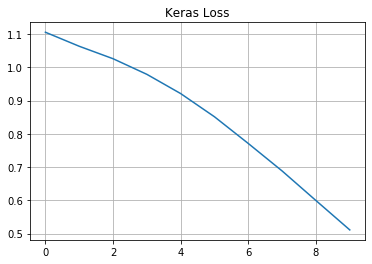

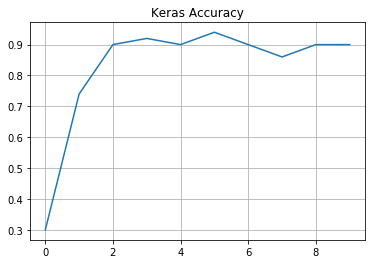

In [9]:
import matplotlib.pyplot as plt
plt.title('Keras Loss')
plt.plot(history.history.get('loss'))
plt.grid()
plt.show()

import matplotlib.pyplot as plt
plt.title('Keras Accuracy')
plt.plot(history.history.get('accuracy'))
plt.grid()
plt.show()

In [10]:
model.evaluate(train_data, train_labels)[1] * 100.0

50/50 [==============================] - 1s 12ms/step


92.00000166893005